In [8]:
import numpy as np
x = ['1', '1', '1', '0', '0', '0', '1', '0', '1', '1', 'C0', 'C1']
np.unique([n for n in x if n.isnumeric()]).shape[0]

2

In [7]:
[n for n in x if n.isnumeric()]

[]

In [4]:
import numpy as np

data = np.load('../client_descr_feature_skew_n_clients_10.npy', allow_pickle=True)


array([[ 4.00320470e-01,  3.68434727e-01,  9.76199448e-01,
         1.04262710e+00,  9.75255013e-01,  1.93638790e+00,
         1.22327328e+00,  9.28671062e-01,  1.22466171e+00,
         1.40514803e+00,  9.66458333e-01,  9.70833333e-01,
         9.26250000e-01,  9.15625000e-01,  9.36041667e-01,
         9.25208333e-01,  9.10833333e-01,  9.36458333e-01,
         9.20208333e-01,  9.00833333e-01, -2.35231584e+00,
        -9.33953422e+00,  6.33381583e+00,  1.93170492e-03,
        -1.74186414e+00, -4.22334826e+00,  6.96038346e+00,
        -5.02696744e+00, -1.41624186e+00,  1.38085817e-01,
        -2.35231584e+00, -9.33953422e+00,  6.33381583e+00,
         1.93170492e-03, -1.74186414e+00, -4.22334826e+00,
         6.96038346e+00, -5.02696744e+00, -1.41624186e+00,
         1.38085817e-01],
       [ 4.22719121e-01,  3.06638062e-01,  1.11993372e+00,
         1.03658736e+00,  1.05473959e+00,  1.88323343e+00,
         1.29644227e+00,  8.96449745e-01,  1.20084071e+00,
         1.53785646e+00,  9.62

In [6]:
data[0]

array([ 4.00320470e-01,  3.68434727e-01,  9.76199448e-01,  1.04262710e+00,
        9.75255013e-01,  1.93638790e+00,  1.22327328e+00,  9.28671062e-01,
        1.22466171e+00,  1.40514803e+00,  9.66458333e-01,  9.70833333e-01,
        9.26250000e-01,  9.15625000e-01,  9.36041667e-01,  9.25208333e-01,
        9.10833333e-01,  9.36458333e-01,  9.20208333e-01,  9.00833333e-01,
       -2.35231584e+00, -9.33953422e+00,  6.33381583e+00,  1.93170492e-03,
       -1.74186414e+00, -4.22334826e+00,  6.96038346e+00, -5.02696744e+00,
       -1.41624186e+00,  1.38085817e-01, -2.35231584e+00, -9.33953422e+00,
        6.33381583e+00,  1.93170492e-03, -1.74186414e+00, -4.22334826e+00,
        6.96038346e+00, -5.02696744e+00, -1.41624186e+00,  1.38085817e-01])

In [14]:
range(len(np.array(data))//10)

range(0, 1)

In [7]:
import copy

# client_descr_scaled
class client_descr_scaling:
    def __init__(self, 
                 scaling_method: int = 1, 
                 scaler = None, # MinMaxScaler() or StandardScaler()
                 *args,
                 **kwargs):
        self.scaling_method = scaling_method
        self.scaler = scaler
        self.scalers = None
        self.fitted = False # TODO didn't get it

    def scale(self, client_descr: np.ndarray = None) -> np.ndarray:
        # Normalize by group of descriptors
        if self.scaling_method == 1:
            if self.scalers is None:
                self.scalers = [copy.deepcopy(self.scaler) for _ in range(len(client_descr)//10)]
                
            if self.fitted:
                scaled_client_descr = np.zeros(client_descr.shape)
                for i, scaler in enumerate(self.scalers):
                    single_client_descr = client_descr[:, i*10:(i+1)*10]
                    scaled_client_descr[:, i*10:(i+1)*10] = scaler.transform(
                        single_client_descr.reshape(-1, 1)).reshape(single_client_descr.shape)
                
            else:
                self.fitted = True
                scaled_client_descr = np.zeros(client_descr.shape)
                for i, scaler in enumerate(self.scalers):
                    single_client_descr = client_descr[:, i*10:(i+1)*10]
                    if i == 0:
                        print(single_client_descr)
                    scaled_client_descr[:, i*10:(i+1)*10] = scaler.fit_transform(
                        single_client_descr.reshape(-1, 1)).reshape(single_client_descr.shape)
            
            return scaled_client_descr
        
        elif self.scaling_method == 2:
            # TODO weighted scaling
            return None
        
        else:
            print("Invalid scaling method!")
            return None

In [8]:
from sklearn.preprocessing import MinMaxScaler
descriptors_scaler = client_descr_scaling(scaling_method=1,
                                              scaler=MinMaxScaler(),
                                              )

In [12]:
descriptors_scaler.scale(np.array(data))

array([[0.06031253, 0.04080646, 0.41260583, 0.45324286, 0.41202807,
        1.        , 0.56375296, 0.38353039, 0.56460233, 0.67501463,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.07401488, 0.00300242, 0.5005351 , 0.44954806, 0.46065267,
        0.96748282, 0.608514  , 0.36381904, 0.55002986, 0.75619885,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

In [3]:
[5] * 2 + [4] * 2

[5, 5, 4, 4]

In [2]:
x = [5] * 2
x.extend([4] * 2)
x

[5, 5, 4, 4]

In [1]:
x = {"loss": [0.03640158958733082, 0.03588872067630291, 0.06730063781142234, 0.026570951379835606, 0.019146106857806443, 0.015999831724911928, 0.013215819653123618, 0.011633613239973783, 0.010042438190430403, 0.008666202938184143, 0.007886046171188354, 0.007017786893993616, 0.006707331910729408, 0.006135108415037394, 0.005814040452241898, 0.005438063992187381, 0.004902350902557373, 0.004754467098973691, 0.004460264858789742, 0.004276059311814606, 0.00398266336414963, 0.0039020561380311847, 0.003883093502372503, 0.0035612722393125297, 0.0035451334435492752, 0.00340987800154835, 0.0031848053680732847, 0.0031248444691300394, 0.0031267674872651695, 0.0029954510740935803, 0.0027642927365377546, 0.0028214969905093314, 0.0026867588749155402, 0.0026570673449896275, 0.0026243385742418467, 0.0025362791609950365, 0.0025366639252752065, 0.002452469849959016, 0.002400971786119044, 0.002368341898545623], "accuracy": [0.13558333333333333, 0.15133333333333332, 0.26458333333333334, 0.4101666666666667, 0.58825, 0.6485833333333333, 0.7155833333333333, 0.74875, 0.7905, 0.8251666666666667, 0.8421666666666666, 0.8621666666666666, 0.8696666666666667, 0.8810833333333333, 0.8878333333333334, 0.8985833333333333, 0.9083333333333333, 0.9103333333333333, 0.9145, 0.9185, 0.9231666666666667, 0.9248333333333333, 0.9253333333333333, 0.933, 0.931, 0.9320833333333334, 0.93875, 0.94, 0.9399166666666666, 0.9429166666666666, 0.9478333333333333, 0.9465, 0.94875, 0.9491666666666667, 0.9496666666666667, 0.9525833333333333, 0.9514166666666667, 0.9530833333333333, 0.9543333333333334, 0.9545833333333333]}

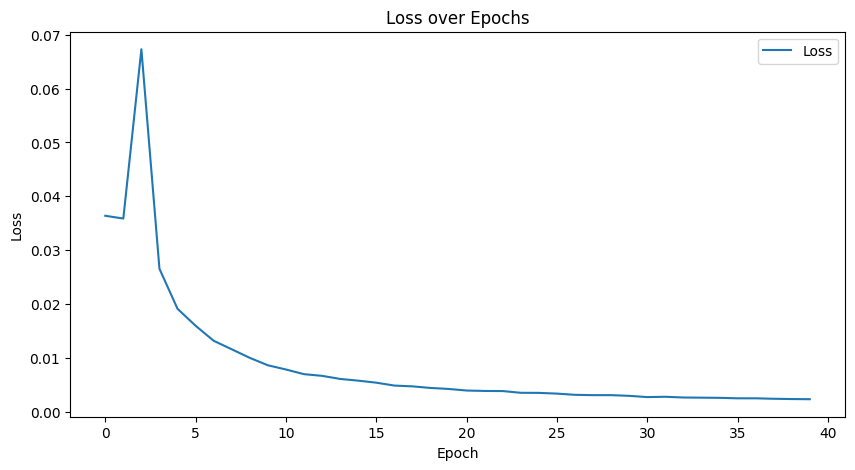

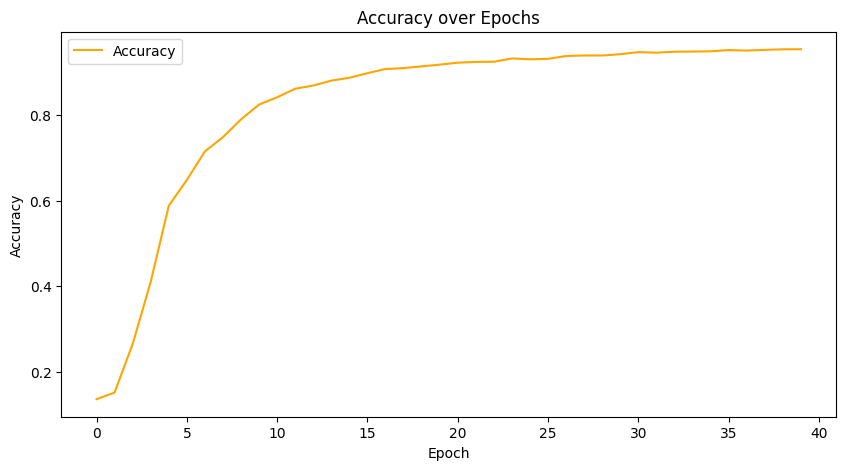

In [2]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(x['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(x['accuracy'], label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [ ]:
# Step 3: Compute the derivative using NumPy's diff function
# The derivative represents the change in accuracy between consecutive steps
derivative = np.diff(x['accuracy'])

# Optional: Create an array for the x-axis that aligns with the derivative data
# Since diff reduces the array length by 1, we align it accordingly
x_derivative = np.arange(1, len(x['accuracy']))

# Step 4: Plot the original accuracy and its derivative
plt.figure(figsize=(14, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(x['accuracy'], marker='o', linestyle='-', color='blue')
plt.title('Accuracy Over Steps')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Derivative of Accuracy
plt.subplot(2, 1, 2)
plt.plot(x_derivative, derivative, marker='x', linestyle='-', color='red')
plt.title('Derivative of Accuracy')
plt.xlabel('Step')
plt.ylabel('Change in Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

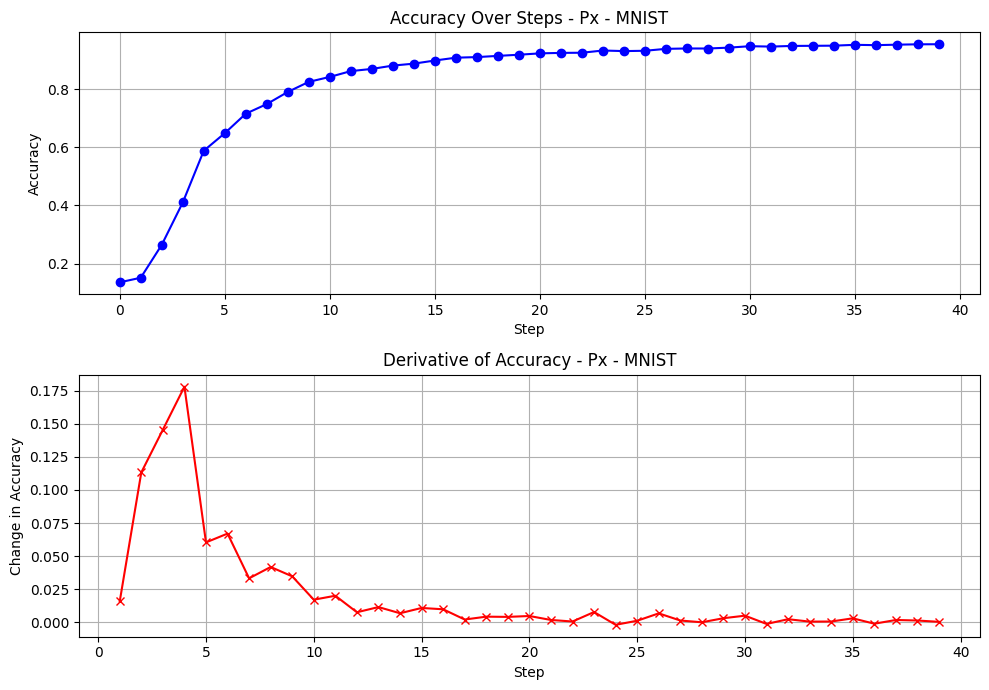

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = {"loss": [0.03640158958733082, 0.03588872067630291, 0.06730063781142234, 0.026570951379835606, 0.019146106857806443, 0.015999831724911928, 0.013215819653123618, 0.011633613239973783, 0.010042438190430403, 0.008666202938184143, 0.007886046171188354, 0.007017786893993616, 0.006707331910729408, 0.006135108415037394, 0.005814040452241898, 0.005438063992187381, 0.004902350902557373, 0.004754467098973691, 0.004460264858789742, 0.004276059311814606, 0.00398266336414963, 0.0039020561380311847, 0.003883093502372503, 0.0035612722393125297, 0.0035451334435492752, 0.00340987800154835, 0.0031848053680732847, 0.0031248444691300394, 0.0031267674872651695, 0.0029954510740935803, 0.0027642927365377546, 0.0028214969905093314, 0.0026867588749155402, 0.0026570673449896275, 0.0026243385742418467, 0.0025362791609950365, 0.0025366639252752065, 0.002452469849959016, 0.002400971786119044, 0.002368341898545623], "accuracy": [0.13558333333333333, 0.15133333333333332, 0.26458333333333334, 0.4101666666666667, 0.58825, 0.6485833333333333, 0.7155833333333333, 0.74875, 0.7905, 0.8251666666666667, 0.8421666666666666, 0.8621666666666666, 0.8696666666666667, 0.8810833333333333, 0.8878333333333334, 0.8985833333333333, 0.9083333333333333, 0.9103333333333333, 0.9145, 0.9185, 0.9231666666666667, 0.9248333333333333, 0.9253333333333333, 0.933, 0.931, 0.9320833333333334, 0.93875, 0.94, 0.9399166666666666, 0.9429166666666666, 0.9478333333333333, 0.9465, 0.94875, 0.9491666666666667, 0.9496666666666667, 0.9525833333333333, 0.9514166666666667, 0.9530833333333333, 0.9543333333333334, 0.9545833333333333]}

# Step 3: Compute the derivative using NumPy's diff function
# The derivative represents the change in accuracy between consecutive steps
derivative = np.diff(x['accuracy'])

# Optional: Create an array for the x-axis that aligns with the derivative data
# Since diff reduces the array length by 1, we align it accordingly
x_derivative = np.arange(1, len(x['accuracy']))

# Step 4: Plot the original accuracy and its derivative
plt.figure(figsize=(10, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(x['accuracy'], marker='o', linestyle='-', color='blue')
plt.title('Accuracy Over Steps - Px - MNIST')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Derivative of Accuracy
plt.subplot(2, 1, 2)
plt.plot(x_derivative, derivative, marker='x', linestyle='-', color='red')
plt.title('Derivative of Accuracy - Px - MNIST')
plt.xlabel('Step')
plt.ylabel('Change in Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

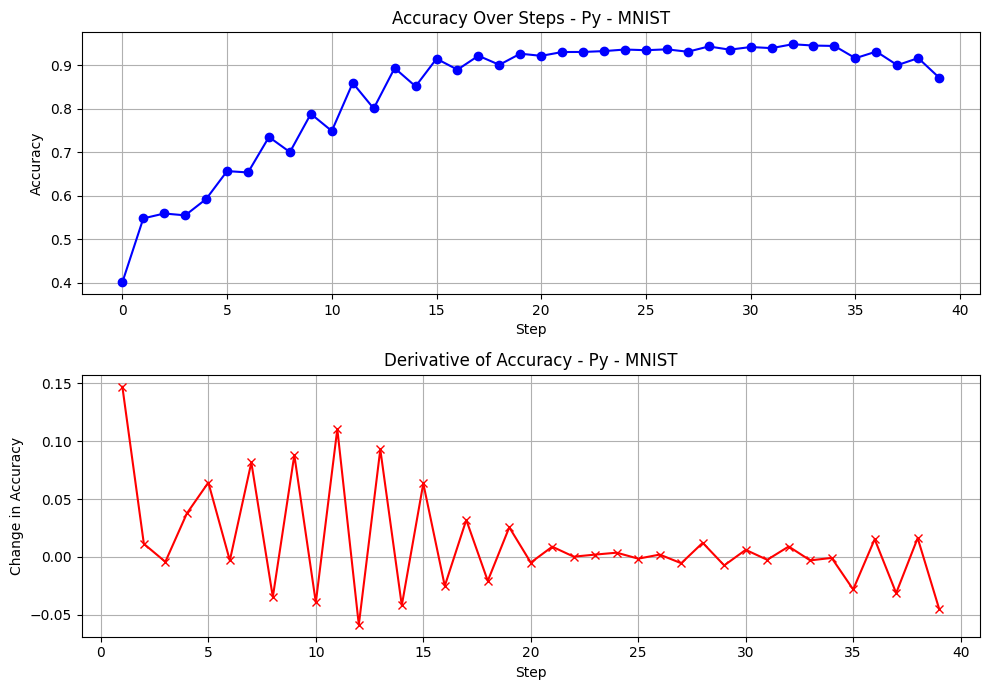

In [9]:
x = {"loss": [0.0442371352421685, 0.02374842290643876, 0.04724530470219676, 0.022243471964860123, 0.02905642246057426, 0.012724582212314067, 0.021187129486246226, 0.01012098167705909, 0.01607131084212829, 0.008732211422938837, 0.012343073475972938, 0.006608837667741533, 0.008716203138404325, 0.0054897889586911, 0.00689253477012882, 0.004550374438012468, 0.005470202685678013, 0.00411612193313109, 0.004799667067609664, 0.003903631231500868, 0.004136408247500805, 0.003719178680903457, 0.0035992162285397714, 0.0034842290233948617, 0.003399039876394434, 0.0033565529282973067, 0.0032238867038445183, 0.0033083114141201435, 0.0028793829507074704, 0.0031905722349246856, 0.0028710791425512867, 0.0028620580656703574, 0.0027568436331480584, 0.0027928936041203816, 0.002667846205101325, 0.0037874743295430785, 0.003067348908376499, 0.004814187235146604, 0.003603105118980128, 0.008661472034201501], "accuracy": [0.4009530852025306, 0.5480239914550982, 0.5592802563470545, 0.5550078054391586, 0.5925560759181662, 0.6568071645715224, 0.6536849889080601, 0.7352723687453784, 0.700517623859995, 0.788513680059157, 0.7490756716785802, 0.8595842576616548, 0.8008380576780872, 0.8937638649248213, 0.851778818502999, 0.9152904444992195, 0.8901487141566018, 0.9221099334483609, 0.9013228165310985, 0.9268753594610138, 0.9219456084134418, 0.930736997781612, 0.9309013228165312, 0.93287322323556, 0.9364883740037795, 0.9349272861720483, 0.9368991865910772, 0.9313942979212884, 0.9435543505052995, 0.9361597239339413, 0.942239750225947, 0.9396927121847013, 0.9486484265877907, 0.9456084134417878, 0.944704625749733, 0.9165228822611124, 0.9318051105085859, 0.9005011913565032, 0.9167693698134911, 0.8717443102456659]}

import numpy as np
import matplotlib.pyplot as plt

# Step 3: Compute the derivative using NumPy's diff function
# The derivative represents the change in accuracy between consecutive steps
derivative = np.diff(x['accuracy'])

# Optional: Create an array for the x-axis that aligns with the derivative data
# Since diff reduces the array length by 1, we align it accordingly
x_derivative = np.arange(1, len(x['accuracy']))

# Step 4: Plot the original accuracy and its derivative
plt.figure(figsize=(10, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(x['accuracy'], marker='o', linestyle='-', color='blue')
plt.title('Accuracy Over Steps - Py - MNIST')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Derivative of Accuracy
plt.subplot(2, 1, 2)
plt.plot(x_derivative, derivative, marker='x', linestyle='-', color='red')
plt.title('Derivative of Accuracy - Py - MNIST')
plt.xlabel('Step')
plt.ylabel('Change in Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
# read data json
import json

x = []
for i in range(5):
    with open(f'../fedavg/histories/42/LeNet5/MNIST/static/distributed_metrics_{i}.json') as f:
        x.append(json.load(f))

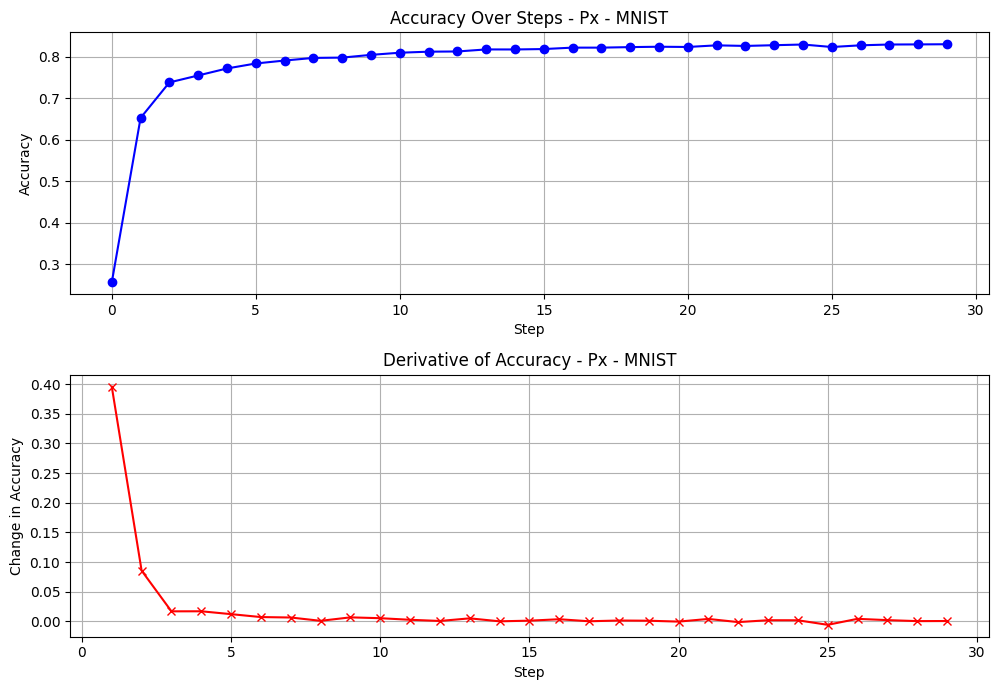

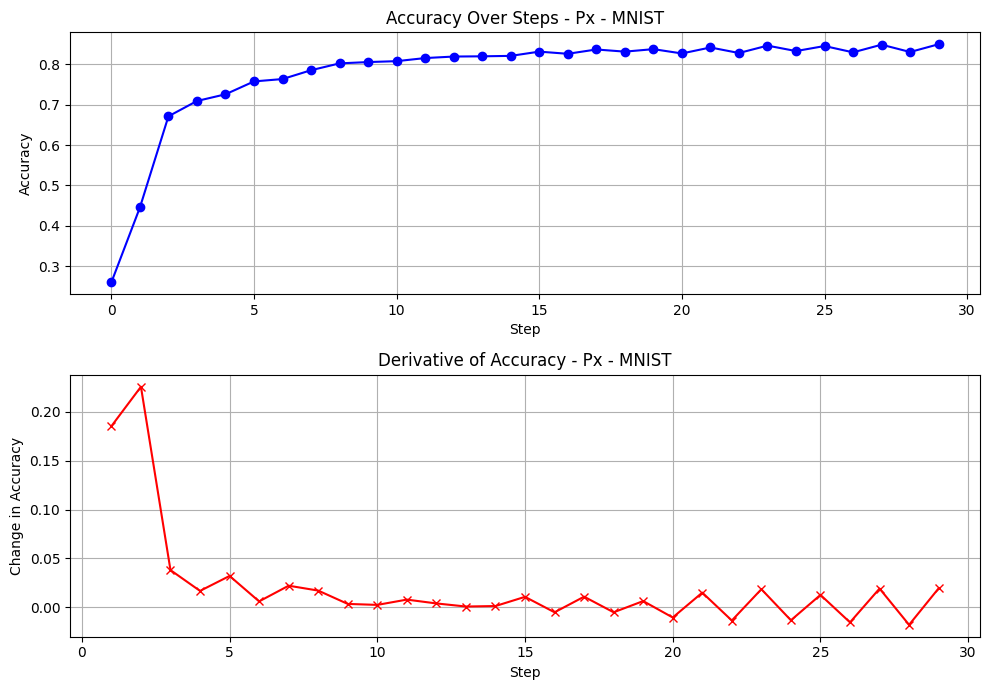

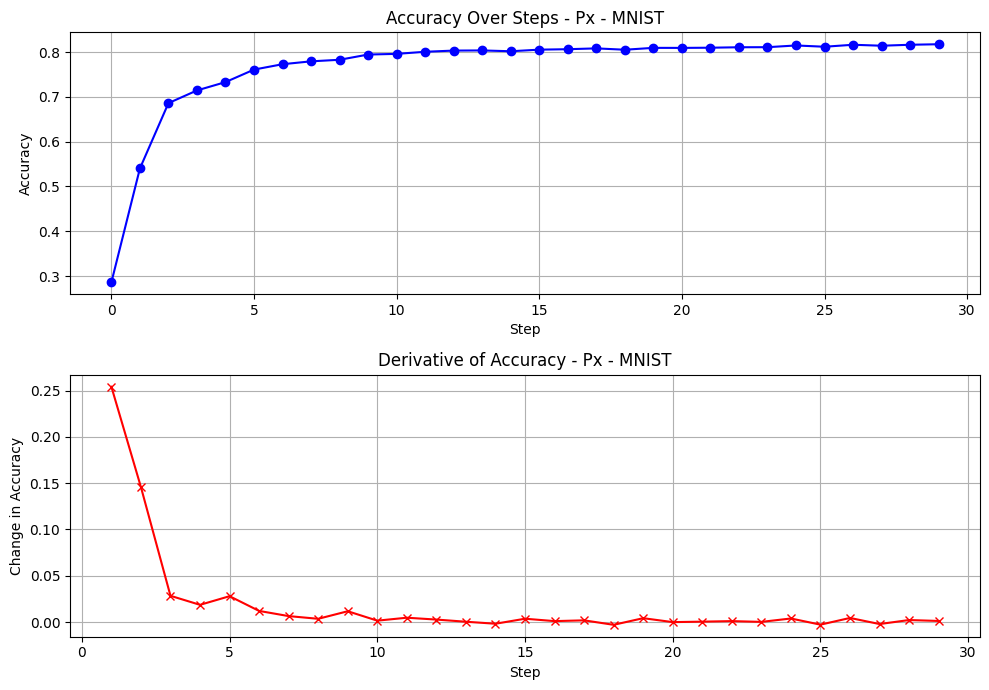

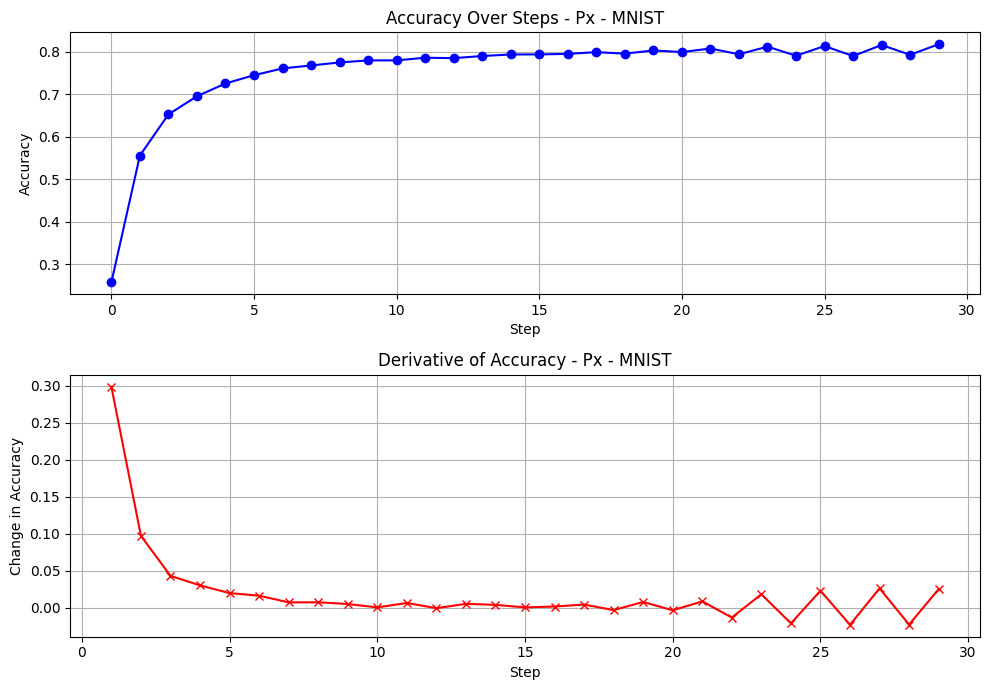

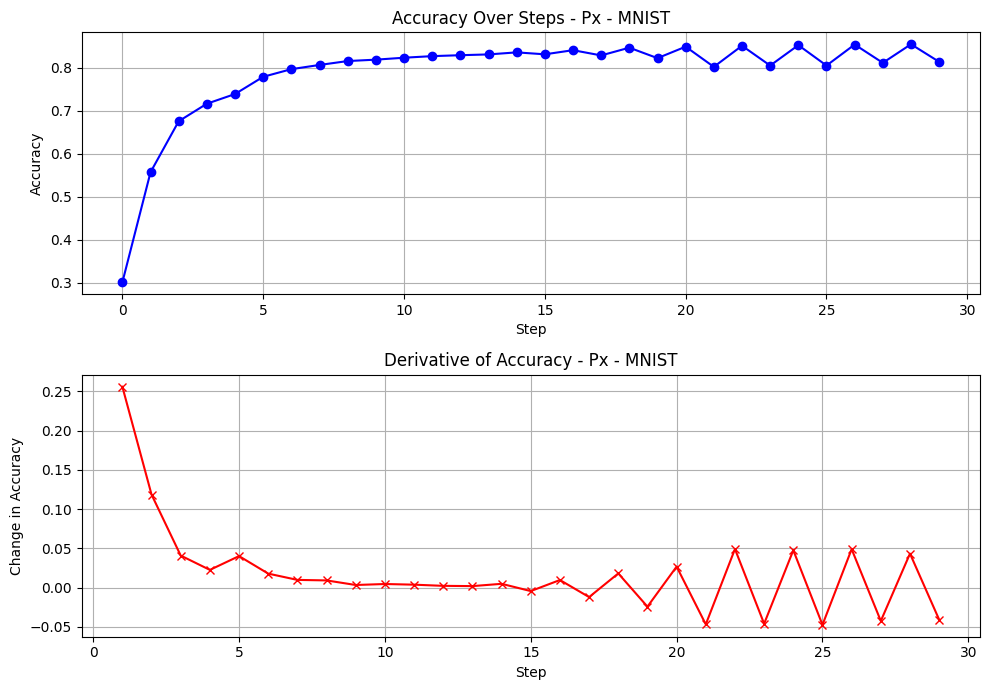

In [18]:
for i in range(5):

    # Step 3: Compute the derivative using NumPy's diff function
    # The derivative represents the change in accuracy between consecutive steps
    derivative = np.diff(x[i]['accuracy'])

    # Optional: Create an array for the x-axis that aligns with the derivative data
    # Since diff reduces the array length by 1, we align it accordingly
    x_derivative = np.arange(1, len(x[i]['accuracy']))

    # Step 4: Plot the original accuracy and its derivative
    plt.figure(figsize=(10, 7))

    # Plot Accuracy
    plt.subplot(2, 1, 1)
    plt.plot(x[i]['accuracy'], marker='o', linestyle='-', color='blue')
    plt.title('Accuracy Over Steps - Px - MNIST')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Plot Derivative of Accuracy
    plt.subplot(2, 1, 2)
    plt.plot(x_derivative, derivative, marker='x', linestyle='-', color='red')
    plt.title('Derivative of Accuracy - Px - MNIST')
    plt.xlabel('Step')
    plt.ylabel('Change in Accuracy')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

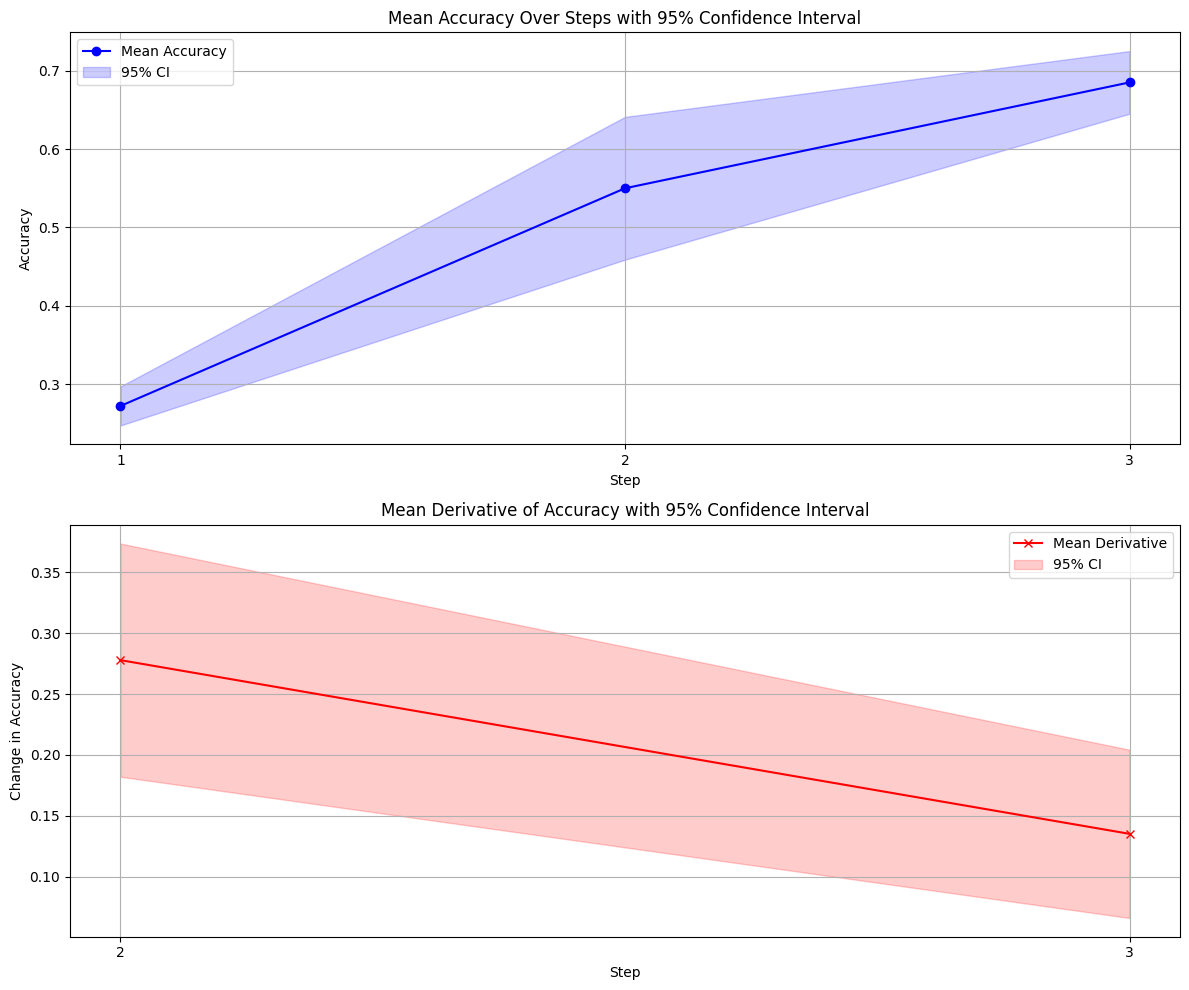

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Your provided data
data = [
    {'loss': [0.03619307316839695, 0.017719762027263643, 0.013588865753263235],
     'accuracy': [0.257, 0.6523333333333333, 0.73875]},
    {'loss': [0.03628975376486778, 0.03212565109133721, 0.017492814082652332],
     'accuracy': [0.26008333333333333, 0.44558333333333333, 0.67175]},
    {'loss': [0.03622479401528835, 0.02379863727837801, 0.01713951360434294],
     'accuracy': [0.28608333333333336, 0.5400833333333334, 0.6855833333333333]},
    {'loss': [0.03621283359825611, 0.022006564401090146, 0.01914817690849304],
     'accuracy': [0.2569166666666667, 0.5554166666666667, 0.6530833333333333]},
    {'loss': [0.036226465553045276, 0.023927273973822594, 0.0216758631169796],
     'accuracy': [0.3006666666666667, 0.5565833333333333, 0.6765]}
]

# Extract accuracy lists from each run
accuracy_runs = [run['accuracy'] for run in data]

# Convert to NumPy array for easier manipulation
accuracy_np = np.array(accuracy_runs)  # Shape: (5, 3)

# Number of runs and steps
num_runs, num_steps = accuracy_np.shape

# Compute mean accuracy per step
mean_accuracy = np.mean(accuracy_np, axis=0)

# Compute standard error per step
sem_accuracy = stats.sem(accuracy_np, axis=0)

# Compute 95% confidence intervals
confidence_level = 0.95
degrees_freedom = num_runs - 1
confidence_intervals = sem_accuracy * stats.t.ppf((1 + confidence_level) / 2., degrees_freedom)

# Compute derivatives for each run
derivatives = np.diff(accuracy_np, axis=1)  # Shape: (5, 2)

# Compute mean derivative per step
mean_derivative = np.mean(derivatives, axis=0)

# Compute standard error for derivatives
sem_derivative = stats.sem(derivatives, axis=0)

# Compute 95% confidence intervals for derivatives
confidence_intervals_derivative = sem_derivative * stats.t.ppf((1 + confidence_level) / 2., degrees_freedom)

# Define step indices
steps_accuracy = np.arange(1, num_steps + 1)
steps_derivative = np.arange(2, num_steps + 1)  # Derivatives correspond to steps 2 and 3

# Create a figure with two subplots
plt.figure(figsize=(12, 10))

# ---- Top Plot: Accuracy ----
plt.subplot(2, 1, 1)
plt.plot(steps_accuracy, mean_accuracy, marker='o', linestyle='-', color='blue', label='Mean Accuracy')
plt.fill_between(steps_accuracy,
                 mean_accuracy - confidence_intervals,
                 mean_accuracy + confidence_intervals,
                 color='blue', alpha=0.2, label='95% CI')
plt.title('Mean Accuracy Over Steps with 95% Confidence Interval')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.xticks(steps_accuracy)
plt.legend()
plt.grid(True)

# ---- Bottom Plot: Derivative of Accuracy ----
plt.subplot(2, 1, 2)
plt.plot(steps_derivative, mean_derivative, marker='x', linestyle='-', color='red', label='Mean Derivative')
plt.fill_between(steps_derivative,
                 mean_derivative - confidence_intervals_derivative,
                 mean_derivative + confidence_intervals_derivative,
                 color='red', alpha=0.2, label='95% CI')
plt.title('Mean Derivative of Accuracy with 95% Confidence Interval')
plt.xlabel('Step')
plt.ylabel('Change in Accuracy')
plt.xticks(steps_derivative)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:


# Extract accuracy lists from each run
accuracy_runs = [run['accuracy'] for run in data]

# Convert to NumPy array for easier manipulation
accuracy_np = np.array(accuracy_runs)  # Shape: (5, 3)

# Number of runs and steps
num_runs, num_steps = accuracy_np.shape

# Compute mean accuracy per step
mean_accuracy = np.mean(accuracy_np, axis=0)

# Compute standard error per step
sem_accuracy = stats.sem(accuracy_np, axis=0)

# Compute 95% confidence intervals
confidence_level = 0.95
degrees_freedom = num_runs - 1
confidence_intervals = sem_accuracy * stats.t.ppf((1 + confidence_level) / 2., degrees_freedom)

# Compute derivatives for each run
derivatives = np.diff(accuracy_np, axis=1)  # Shape: (5, 2)

# Compute mean derivative per step
mean_derivative = np.mean(derivatives, axis=0)

# Compute standard error for derivatives
sem_derivative = stats.sem(derivatives, axis=0)

# Compute 95% confidence intervals for derivatives
confidence_intervals_derivative = sem_derivative * stats.t.ppf((1 + confidence_level) / 2., degrees_freedom)

# Define step indices
steps_accuracy = np.arange(1, num_steps + 1)
steps_derivative = np.arange(2, num_steps + 1)  # Derivatives correspond to steps 2 and 3

# Create a figure with two subplots
plt.figure(figsize=(12, 10))

# ---- Top Plot: Accuracy ----
plt.subplot(2, 1, 1)
plt.plot(steps_accuracy, mean_accuracy, marker='o', linestyle='-', color='blue', label='Mean Accuracy')
plt.fill_between(steps_accuracy,
                 mean_accuracy - confidence_intervals,
                 mean_accuracy + confidence_intervals,
                 color='blue', alpha=0.2, label='95% CI')
plt.title('Mean Accuracy Over Steps with 95% Confidence Interval')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.xticks(steps_accuracy)
plt.legend()
plt.grid(True)

# ---- Bottom Plot: Derivative of Accuracy ----
plt.subplot(2, 1, 2)
plt.plot(steps_derivative, mean_derivative, marker='x', linestyle='-', color='red', label='Mean Derivative')
plt.fill_between(steps_derivative,
                 mean_derivative - confidence_intervals_derivative,
                 mean_derivative + confidence_intervals_derivative,
                 color='red', alpha=0.2, label='95% CI')
plt.title('Mean Derivative of Accuracy with 95% Confidence Interval')
plt.xlabel('Step')
plt.ylabel('Change in Accuracy')
plt.xticks(steps_derivative)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()